# Stackforge tutorial 11-12
This is a basic and short toturial of how to generate stacked electron density profile using TNG halos. **I will try to keep eveything informal and friendly**!

To use stackforge are necessary the next packages:
    
    * numpy
    * matplotlib
    * astropy
    * scipy
    * emcee
    * numba
    * corner
    * tqdm
    * h5py
    * illustris_python
All the package can be installed directly by `pip install`, all of them are automatically installed with `stackforge`, except for **illustris_python** which must be installed by cloning the repository from github.

    git clone git@github.com:illustristng/illustris_python.git
    cd illustris_python
    pip install .

`stackforge` must be installed in the same way that `illustris_python`, by downloading the repository.
    
    git clone https://github.com/javierurrutialeiva/stackforge.git --branch master --single-branch 
    cd stackforge 
    pip install .

In [2]:
import stackforge
import matplotlib.pyplot as plt
import numpy as np
from plottery.plotutils import update_rcParams
update_rcParams()

### Single halo
Let's start loading a single halo. The halos in TNG are sorted by mass, each halo has an associated index, so the halo with index 0 is the most massive one. To load a single halo is possible use the `halo` class from `stackforge`, but frist is necessary to define a basePath which contains all the snapshots and groups catalgos. **To load a halo is mandatory to download the respective snapshot and group catalog**, which are available on the [TNG webpage](https://www.tng-project.org/data/), a full data specification can be found on the [next link](https://www.tng-project.org/data/docs/specifications/). Let's define the dataPath as the results of `TNG300-3` (lowest resolution)


In [3]:
basePath = "/scratch/users/javierul/sims.TNG/TNG300-3/output/"

Also is necessary give a snapshot number of a redshift. The equivalence in redshift in the case of `TNG300-3` is available [here](https://www.tng-project.org/data/downloads/TNG300-3/)

In [4]:
h = stackforge.halo(sim = "TNG", basePath = basePath, redshift = 0, haloID = 1) 

`h.group` containts important properties of the current `halo`. The list of available properties is the next:

* **Vel**: peculiar comoving velocity $\vec{v} = (v_x, v_y, v_z)$ in $m/s/a$ .
* **M200c**: Total mass enclosed by a sphere with mean density equl to $200$ times the critical density at the respective redshift in $M_{\odot}$ units.
* **M500c**: Total mass enclosed by a sphere with mean density equal to $500$ times the critical density at the respective redshift in $M_{\odot}$ units.
* **M200m**: Total mass enclosed by a sphere with mean density equal to $200$ times the mean density of the Universe at the respective redshift in $M_{\odot}$ units.
* **MTopHat**: Total mass enclosed by a sphere with mean density equal to $\Delta_c$ times the critical density, corresponding to the top-hat collapse threshold at the respective redshift, obtained from [Brayn+1998](http://adsabs.harvard.edu/abs/1998ApJ...495...80B)
* **M200c**, **R500c**, **R200m** and **Rtophat** corresponds to the radius of a sphere that encloses $200c$ (critical), $500c$ (critical), $200$ (mean) and $\Delta_c$ (critical) density

In [9]:
h.group

{'Vel': array([121368.625,  36154.664, -29663.072], dtype=float32),
 'M200c': 841334140625000.0,
 'M500c': 632516953125000.0,
 'M200m': 1071456718750000.0,
 'MTopHat': 968060234375000.0,
 'R200c': 1535.3447,
 'R500c': 1028.6171,
 'R200m': 2461.941,
 'RTopHat': 2011.4183}

`h.gas` is a `dict` that containts all the gas particles contained by the halo (graviatinally bound) 

In [10]:
h.gas

{'Coordinates': array([[ 82004.85806655, 121426.91430014, 195085.28967609],
        [ 82009.15456374, 121424.71054198, 195081.59092745],
        [ 82012.03640144, 121432.25221928, 195085.54076733],
        ...,
        [ 80263.57805573, 122294.60321019, 194467.66166927],
        [ 81687.49456593, 120862.04554896, 193973.65058369],
        [ 81785.77891131, 120989.73418314, 193909.50343801]]),
 'ElectronAbundance': array([1.1610619, 1.161132 , 1.1610867, ..., 1.1580422, 1.1581562,
        1.1579689], dtype=float32),
 'InternalEnergy': array([2410996.  , 2297803.8 , 2529654.2 , ..., 1817313.9 ,  245228.39,
         363934.47], dtype=float32),
 'Masses': array([6.5094886e+08, 4.9770474e+08, 3.4625715e+08, ..., 5.6191168e+08,
        4.4887872e+08, 6.6095373e+08], dtype=float32)}

The meaning of each `key` are the next:
* **Coordinates**: Spatial position within the periodic box in units of kpc/h/a.
* **ElectronAbundance**: Fractional electron density respect to the total hydrogen number density. 
* **InternalEnergy**: Thermal energy per unit mass in $(km/s)^2$.
* **Masses**: Respective particle mass in $M_{\odot}$.

To access to the halo position (in $kpc/h/a$) and mass (in $10^{10}M_{\odot})$:

In [11]:
h.Pos, h.Mass

(array([ 82007.1 , 121433.17, 195087.  ], dtype=float32), 95920.62)

To generate a radial profile of $n_e$ and other properties must be run `halo.generate_profiles`, it receive the next "*basic*" arguments. 
* R: radius in kpc/h/a or kpc/h.
* projection: can be '3d' or '2d', if it is '2d' the profile will be computed in a projected plane given by the argument `axis`. If `triax` is `true` the profile is computed in each possible projection and averaged. 
* R_spacing: `log` or `linear`.

In [13]:
R = np.linspace(0, 8000, 50)
h.generate_profiles(R, projection = "3d", triax = False, R_spacing = "linear")
h.generate_profiles(R, projection = "2d", triax = True, axis = ["x","z"], R_spacing = "linear")

The profiles are stored as `profiles2D` or `profiles3D` depending on the chosen projection. The available profiles are electron number density, $n_e\cdot T$, $n_e\cdot T^2$, $T$ and $f_e$. 

In [14]:
np.shape(h.profiles2D)

(5, 49)

In [15]:
ne2d = h.profiles2D[0] #extract electron number density profiles
ne3d = h.profiles3D[0] #3d profile

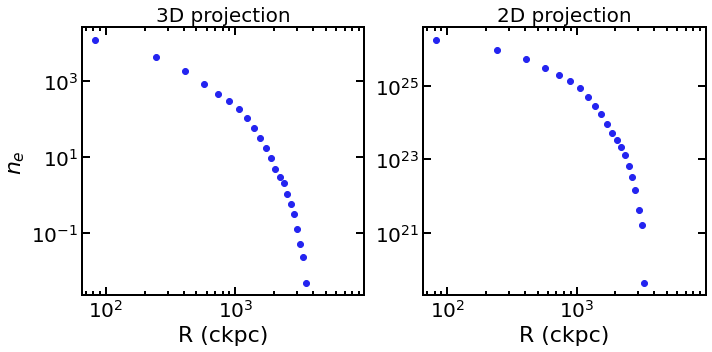

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10, 5), sharex = True)
ax1.scatter(h.R_centers, ne3d, label = "3D")
ax2.scatter(h.R_centers, ne2d, label = "2D")
ax1.set(xlabel = "R (ckpc)", ylabel = "$n_{e}$",xscale = "log", yscale = "log")
ax1.set_title("3D projection", fontsize = 20)
ax2.set(xlabel = "R (ckpc)", xscale = "log", yscale = "log")
ax2.set_title("2D projection", fontsize = 20)
fig.tight_layout()


The profile has a better behavior in `log` spacing, which can be obtained by changing the parameter `R_spacing`, **this is mandatory** or the profiles would not be computed correctly. 

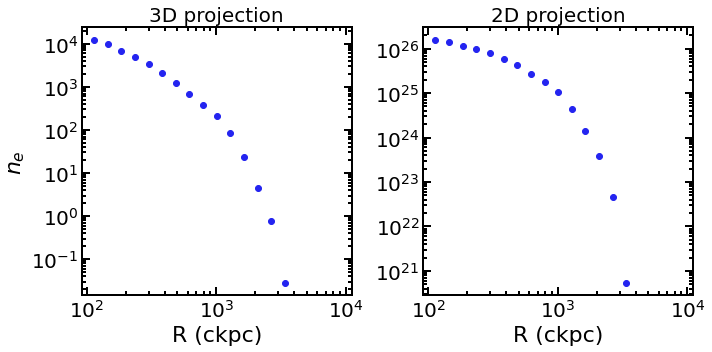

In [17]:
R = np.logspace(2, 4, 20)
#this will overwrite the profiles
h.generate_profiles(R, projection = "3d", triax = False, R_spacing = "log")
h.generate_profiles(R, projection = "2d", triax = True, axis = ["x","z"], R_spacing = "log")
ne2d = h.profiles2D[0]
ne3d = h.profiles3D[0]
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10, 5), sharex = True)
ax1.scatter(h.R_centers, ne3d, label = "3D")
ax2.scatter(h.R_centers, ne2d, label = "2D")
ax1.set(xlabel = "R (ckpc)", ylabel = "$n_{e}$",xscale = "log", yscale = "log")
ax1.set_title("3D projection", fontsize = 20)
ax2.set(xlabel = "R (ckpc)", xscale = "log", yscale = "log")
ax2.set_title("2D projection", fontsize = 20)
fig.tight_layout()

To load an entire snap at a given redshift is possible to run `load_snap`, this is necessary if one want to obtain the two halo term. 

In [18]:
snap = stackforge.load_snap(basePath, redshift = 0) #it takes a while and can collapse the memory

The snapshot can be pass as argument, it is also necessary put `use_snap` as true. It computes the total profile taking into account all the surrounded particles, even those that are not part of the halo (unbound). To compute the 2halo term is simply necessary to substract the total profile with the obtained before (1halo term).

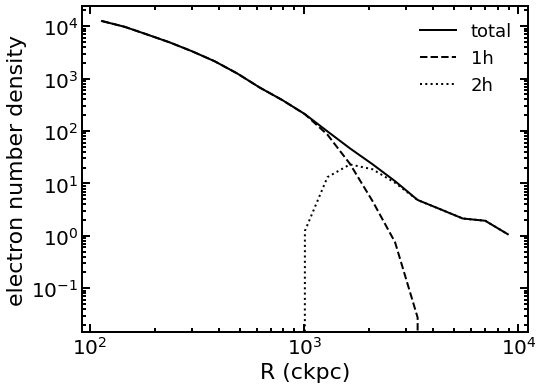

In [20]:
h.generate_profiles(R, projection = "3d", use_snap = True, snap = snap, R_spacing = "log")
ne3d_total = h.profiles3D[0] #it computed the total profile (1h + 2h)
ne3d_2h = ne3d_total - ne3d #to compute the 2h term it is simply the difference between total and 1halo
fig, ax = plt.subplots(figsize = (8, 6))
ax.loglog(h.R_centers, ne3d_total, color = "black", label = "total", ls = "solid")
ax.loglog(h.R_centers, ne3d, label = "1h", color = "black", ls = "--")
ax.loglog(h.R_centers, ne3d_2h, label = "2h", color = "black", ls = "dotted")
ax.legend(frameon = False)
ax.set(xlabel = "R (ckpc)", ylabel = "electron number density")
fig.savefig("electron_number_density_2h.pdf")

It takes a couple of seconds to compute the total profile, which is translated in several days to process an entire snapshot with millions of halos, so this is not a practical way. It is possible to instead extract a sub-volume with `load_sub_volume` to avoid to make additional calculations. This function accepts:
* basePath, 
* a snapNum or a redshift
* particle type (see [Data Specifications](https://www.tng-project.org/data/docs/specifications/#sec1b))
* pos: the center of the volume.
* boxSize: size of the subvolume.
* load_halos: if this parameters is true the fuction will load all the halos within a subvolume contained in 'boxSize' ("*sub-subvolume*")
* fields: properties to load from the snapshots (see [Data Specifications](https://www.tng-project.org/data/docs/specifications/#sec1b)).
* geometry: 'box' or 'sphere'.
* fix_boundary_condition: The TNG box is assumed as periodic, if fix_boundary_condition is true, it will substract the half of the size of the periodic box to all the particles located in the half that contains `pos`.
* verbose: print useful messages.
* rmax: radius to extract halos. 
* load_only_halos: load only the halos contained by rmax.

In [21]:
subvolume = stackforge.load_sub_volume(basePath, None, 'gas', redshift = 0, pos = h.Pos, boxSize = 3e4, load_halos = False
                        ,fields = ['Masses','ElectronAbundance', 'InternalEnergy','Coordinates']
                        ,geometry = 'sphere', fix_boundary_condition = True)

  Chunk 0: 311837 particles
  Chunk 1: 310724 particles
  Chunk 2: 263704 particles
  Chunk 3: 226316 particles
  Skipping chunk 4, there are no particles inside volume.
  Skipping chunk 5, there are no particles inside volume.
  Chunk 6: 478989 particles
  Chunk 7: 513153 particles
  Chunk 8: 788639 particles
  Chunk 9: 438302 particles
  Chunk 10: 118765 particles
  Skipping chunk 11, there are no particles inside volume.
  Chunk 14: 147549 particles
  Chunk 15: 252056 particles
Total valid particles: 3850034
Allocated Masses: (3850034,), 0.02 GB
Allocated ElectronAbundance: (3850034,), 0.02 GB
Allocated InternalEnergy: (3850034,), 0.02 GB
Allocated Coordinates: (3850034, 3), 0.09 GB

Second pass: loading data...
  Chunk 0 were saved. Process 311837/3850034
  Chunk 1 were saved. Process 622561/3850034
  Chunk 2 were saved. Process 886265/3850034
  Chunk 3 were saved. Process 1112581/3850034
  Chunk 6 were saved. Process 1591570/3850034
  Chunk 7 were saved. Process 2104723/3850034
  

[None, None, None, None, None, None, None]

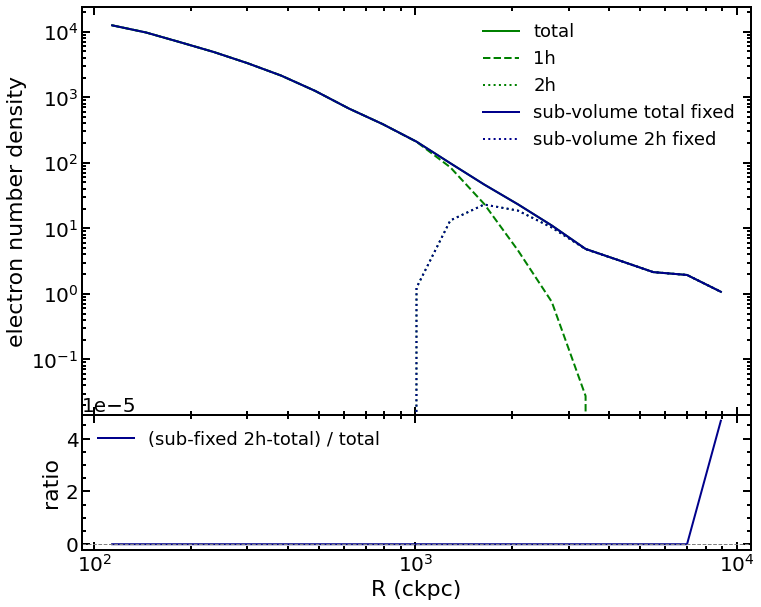

In [22]:
h.generate_profiles(R, projection = "3d", use_snap = True, snap = subvolume, R_spacing = "log")
ne3d_total_subvolume = h.profiles3D[0]
ne3d_2h_subvolume = ne3d_total_subvolume - ne3d
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0)

ax = fig.add_subplot(gs[0, 0])
ax_ratio = fig.add_subplot(gs[1, 0], sharex=ax)

ax.loglog(h.R_centers, ne3d_total, color = "green", label = "total", ls = "solid")
ax.loglog(h.R_centers, ne3d, label = "1h", color = "green", ls = "--")
ax.loglog(h.R_centers, ne3d_2h, label = "2h", color = "green", ls = "dotted")
ax.loglog(h.R_centers, ne3d_total_subvolume, label = "sub-volume total fixed", color = "darkblue")
ax.loglog(h.R_centers, ne3d_2h_subvolume, label = "sub-volume 2h fixed", color = "darkblue", ls = "dotted")
ax.legend(frameon = False)
ax.set(xlabel = "R (ckpc)", ylabel = "electron number density")

ratio1 = np.abs(ne3d_total_subvolume-ne3d_total) / ne3d_total
ax_ratio.plot(h.R_centers, ratio1, color="darkblue", label="(sub-fixed 2h-total) / total")
ax_ratio.set_xscale("log")
ax_ratio.set_ylabel("ratio")
ax_ratio.set_xlabel("R (ckpc)")
ax_ratio.legend(frameon=False)
ax_ratio.axhline(0, color="gray", ls="--", lw=1)

plt.setp(ax.get_xticklabels(), visible=False)



Both profiles are exactly the same. Let's see the execution time of each way.

In [16]:
%timeit h.generate_profiles(R, projection = "3d", use_snap = True, snap = subvolume, R_spacing = "log")

48.7 ms ± 87.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%timeit h.generate_profiles(R, projection = "3d", use_snap = True, snap = snap, R_spacing = "log")

2.82 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It is clear the difference between both methods. It is convenient to extract a set of halos and all the particles around certain radius and work with them instead of work with the entire snapshots. Let's extract all the halos around the selected halo using a radius of $10$ Mpc, and select all the particle within $30$ Mpc. 


In [23]:
subvolume, halos = stackforge.load_sub_volume(basePath, None, 'gas', redshift = 0, pos = h.Pos, boxSize = 3e4,
                        fields = ['Masses','ElectronAbundance', 'InternalEnergy','Coordinates']
                        ,geometry = 'sphere', fix_boundary_condition = True, rmax = 1e4)

  Chunk 0: 311837 particles
  Chunk 1: 310724 particles
  Chunk 2: 263704 particles
  Chunk 3: 226316 particles
  Skipping chunk 4, there are no particles inside volume.
  Skipping chunk 5, there are no particles inside volume.
  Chunk 6: 478989 particles
  Chunk 7: 513153 particles
  Chunk 8: 788639 particles
  Chunk 9: 438302 particles
  Chunk 10: 118765 particles
  Skipping chunk 11, there are no particles inside volume.
  Chunk 14: 147549 particles
  Chunk 15: 252056 particles
Total valid particles: 3850034
Allocated Masses: (3850034,), 0.02 GB
Allocated ElectronAbundance: (3850034,), 0.02 GB
Allocated InternalEnergy: (3850034,), 0.02 GB
Allocated Coordinates: (3850034, 3), 0.09 GB

Second pass: loading data...
  Chunk 0 were saved. Process 311837/3850034
  Chunk 1 were saved. Process 622561/3850034
  Chunk 2 were saved. Process 886265/3850034
  Chunk 3 were saved. Process 1112581/3850034
  Chunk 6 were saved. Process 1591570/3850034
  Chunk 7 were saved. Process 2104723/3850034
  

In [24]:
halos

array([     1,    161,    467,   1084,   1098,   1170,   1442,   2003,
         2229,   2362,   2743,   3235,   4006,   4201,   5082,   6291,
         6954,   7166,   7508,   8547,   9383,   9405,   9607,   9623,
        10789,  11888,  12294,  15074,  15875,  16075,  16685,  17733,
        19835,  20231,  20935,  21990,  22044,  23525,  23780,  23895,
        24719,  25047,  25165,  25941,  27232,  27407,  27748,  27781,
        28512,  28580,  29016,  30271,  31091,  32196,  34767,  36008,
        36383,  36736,  36741,  38799,  39085,  39159,  40130,  41555,
        43185,  44149,  44244,  44838,  45656,  45797,  45996,  48459,
        49769,  50020,  50277,  50816,  51398,  51780,  52023,  52186,
        52352,  52882,  53251,  53681,  54118,  54126,  54282,  55034,
        55204,  55219,  56588,  58598,  58943,  59515,  59667,  60189,
        60746,  61125,  61786,  61940,  62518,  62711,  63470,  64040,
        64487,  65357,  66454,  66686,  66695,  67753,  69399,  69679,
      

In [25]:
len(subvolume['Masses'])

3850034

`subvolume` contains all the particles within an sphere with radius `boxSize`, meanwhile `halos` are indices of all the halos contained by a sphere with radius `rmax`. Let's use `stack` class to generate profile of each halo within our subvolume, which receives a list of haloIDs. 

In [26]:
stack = stackforge.stack(sim = "TNG", basePath = basePath, haloIDs = halos, redshift=0, snap = subvolume)

`stack` contains all individual halos in a list called `halos`

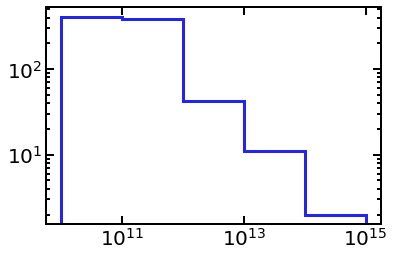

In [27]:
masses = np.array([stack.halos[i].Mass for i in range(len(stack.halos))]) * 1e10
plt.hist(masses, bins = np.logspace(10, 15, 6), log = True, histtype = "step", lw = 3)
plt.xscale("log")

`stack.computr_profiles` computes 1h and 2h halo terms for each halos.

In [28]:
stack.compute_profiles(R, comoving = True, progressBar = True, two_halo_term = True, R_spacing = "log")

Processing halos:   0%|          | 0/846 [00:00<?, ?it/s]/scratch/users/javierul/stackforge/stackforge/src/helpers/misc.py:438: RuntimeWarning: divide by zero encountered in log10
  temp = np.log10(temp)
Processing halos: 100%|██████████| 846/846 [00:31<00:00, 27.00it/s]


In [29]:
profiles1h = np.array([h.profiles1h for h in stack.halos]) #load 1h term
profiles2h = np.array([h.profiles2h for h in stack.halos]) #load 2h term

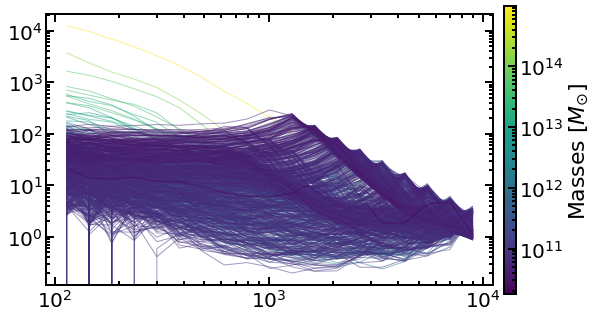

In [30]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize = (8, 5))
cmap = plt.cm.viridis
norm = LogNorm(np.min(masses), np.max(masses))

for i in range(len(profiles1h)):
    ax.loglog(stack.halos[0].R_centers, profiles1h[i][0]+profiles2h[i][0], 
              color = cmap(norm(masses[i])), alpha = 0.5, lw = 1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, cax=fig.add_axes([0.92, 0.1, 0.02, 0.8]))
cbar.set_label("Masses [$M_{\odot}$]")

Unfortanelly it extracts all the halo contained in the subvolume, it is possible to apply a filter to the halos contained in `stack`. Attr can be any key contained in `halo.group` or `total_mass`. It removes all the halos that have the respective selected property with value lower than `vmin` or greater than `vmax`

In [32]:
stack.filter_by_property(attr = "total_mass", vmin = 1e13, vmax = 1e14)
np.log10([stack.halos[i].Mass*1e10 for i in range(len(stack.halos))])

array([13.79088717, 13.52151423, 13.52667024, 13.50300942, 13.42144216,
       13.25722062, 13.21953183, 13.2251181 , 13.13974876, 13.06910164,
       13.64264534])

In [33]:
stack.compute_profiles(R, comoving = True, progressBar = True, two_halo_term = True, R_spacing = "log")

Processing halos: 100%|██████████| 11/11 [00:00<00:00, 19.63it/s]


In [34]:
profiles1h = np.array([h.profiles1h for h in stack.halos]) #load 1h term
profiles2h = np.array([h.profiles2h for h in stack.halos]) #load 2h term

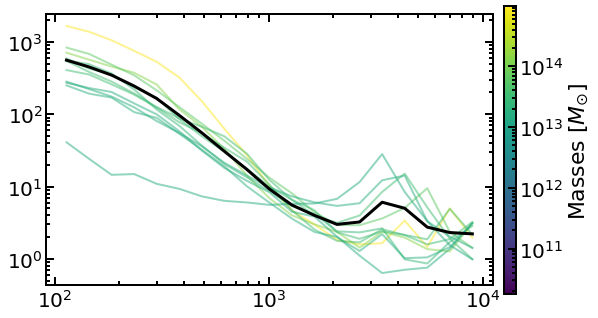

In [35]:
fig, ax = plt.subplots(figsize = (8, 5))
cmap = plt.cm.viridis
norm = LogNorm(np.min(masses), np.max(masses))
stacked_profile = np.mean(profiles1h[:,0] + profiles2h[:,0], axis = 0)
for i in range(len(profiles1h)):
    ax.loglog(stack.halos[0].R_centers, profiles1h[i][0]+profiles2h[i][0], 
              color = cmap(norm(masses[i])), alpha = 0.5, lw = 2)
ax.loglog(stack.halos[0].R_centers, stacked_profile, lw = 3, color = "black")
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, cax=fig.add_axes([0.92, 0.1, 0.02, 0.8]))
cbar.set_label("Masses [$M_{\odot}$]")

To extract the one and two halo term of an entire snapshot is necessary to run `process_snapshot`, it divides the snapshot in `n_subvolumes^3` subvolumes, it is run with the option parallel it will be executed with a number of cores equal to `ncores`, `nmax` is the maximum number of full volume to process, if it is `None` the entire snapshot will be processed, it doesn't have effect if `parallel` is `true`, `fix_boundary_condition` fix the periodic boundary condition of the box, `greometry` can be box or sphere, if projection is `2d`, the particles are projected into the `axis` plane, the final argument is the radius spacing `R_spacing`, that can be `log` or `linear`. It retuns 
* 1h profiles
* 2h profiles
* total masses (DM + gas + stars + BH)
* m200c, m500c, mtophat
* r200c, r500c, mtophat 

In [30]:
p1h, p2h, masses, m200c, m500c, mtophat, r200c, r500c, rtophat = stackforge.process_snapshot("TNG", basePath, 
                                                                R, snapNum = None, redshift = 0, n_subvolumes = 10, 
                                                                parallel = False, ncores = 1, nmax = 3, 
                                                                fix_boundary_condition = True, geometry = "box", 
                                                                projection = "3d", axis = ["x","y"], 
                                                                R_spacing = "log")


Processing 1000 subvolumes...


Limited to first 3 subvolumes (out of 1000 total)
Processing subvolume 1/3


/scratch/users/javierul/stackforge/stackforge/src/helpers/misc.py:438: RuntimeWarning: divide by zero encountered in log10
  temp = np.log10(temp)


  Subvolume (0,0,0): 225 halos processed
Processing subvolume 2/3
  Subvolume (0,0,1): 571 halos processed
Processing subvolume 3/3
  Subvolume (0,0,2): 519 halos processed


The profiles can be splitted in mass bins to compute stacked profiles. **Some halos have M200c/M500c equal to 0!**

Text(0.5, 0, 'R (ckpc/h)')

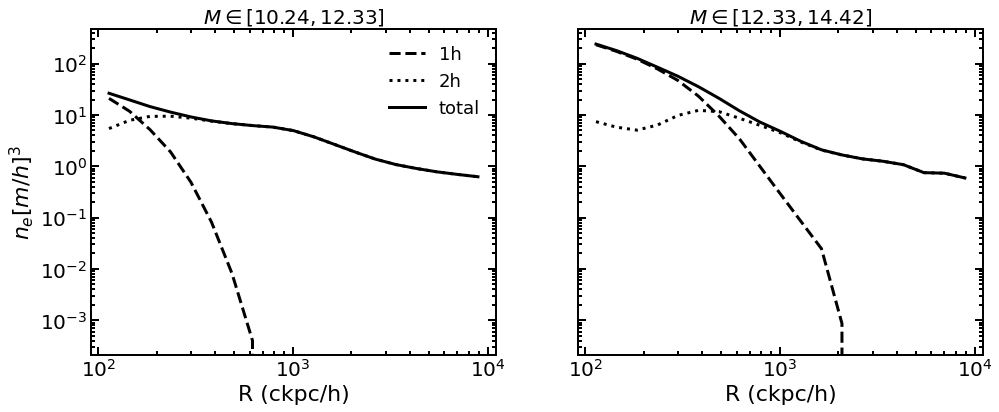

In [32]:
M = masses*1e10
Mbins = np.logspace(np.log10(np.min(M)), np.log10(np.max(M)), 3)
fig, ax = plt.subplots(1,2, figsize = (16, 6), sharey = 'row')
R_centers = 0.5*(R[1:] + R[:-1])
for i in range(len(Mbins) - 1):
    mi, mf = Mbins[i], Mbins[i + 1]
    mask = np.where((M >= mi) & (M < mf))
    profiles_1h = p1h[mask][:,0] #electron density profiles
    profiles_2h = p2h[mask][:,0]
    stacked_1h_profile = np.mean(profiles_1h, axis = 0)
    stacked_2h_profile = np.mean(profiles_2h, axis = 0)
    ax[i].loglog(R_centers, stacked_1h_profile, ls = "--", lw = 3, color = "black", label = "1h")
    ax[i].loglog(R_centers, stacked_2h_profile, ls = "dotted", lw = 3, color = "black", label = "2h")
    ax[i].loglog(R_centers, stacked_1h_profile + stacked_2h_profile, ls = "solid", 
                 lw = 3, color = "black", label = "total")
    ax[i].set_title("$M\in[%.2f, %.2f]$" % (np.log10(mi), np.log10(mf)), fontsize = 20)
ax[0].legend(frameon = False)
ax[0].set_ylabel("$n_e [m/h]^{3}$")
ax[0].set_xlabel("R (ckpc/h)")
ax[1].set_xlabel("R (ckpc/h)")

To extract only the one halo term for an entire snapshot is possible to use the `extract_one_halo_term`, this function doesn't use the subvolume approach, instead divides the entire sample of halos in chunks. The arguments are similar, except that this function accepts a minimal and maximum mass `Mmin` and `Mmax`.  Let's extract all the halo with masses between $10^{13}$ and $10^{14}$


In [36]:
R = np.logspace(2, 4, 20)
R

array([  100.        ,   127.42749857,   162.37767392,   206.91380811,
         263.66508987,   335.98182863,   428.13323987,   545.55947812,
         695.19279618,   885.86679041,  1128.83789168,  1438.44988829,
        1832.98071083,  2335.72146909,  2976.35144163,  3792.69019073,
        4832.93023857,  6158.48211066,  7847.59970351, 10000.        ])

In [37]:
p1h, masses, m200c, m500c, mtophat, r200c, r500c, rtophat = stackforge.extract_one_halo_term("TNG", basePath, R, 
                                                                parallel = True, redshift = 0., R_spacing = "log",
                                                                ncores = 16, nchunks = 500, Mmin = 10**(13),
                                                                Mmax = 1e14)

Extracting one halo term from snapshot 99
Loading all available halo
Available halos = 377342
  Minimum halo mass set to 10000000000000
  New halo lenght = 3842
  Maximum halo mass set to 100000000000000.0
  New halo lenght = 3590
 (112) => 7 halos have been processed.
 (120) => 7 halos have been processed.
 (104) => 7 halos have been processed.
 (96) => 7 halos have been processed.
 (88) => 8 halos have been processed.
 (48) => 8 halos have been processed. (72) => 8 halos have been processed.

 (8) => 8 halos have been processed.
 (24) => 8 halos have been processed.
 (40) => 8 halos have been processed. (80) => 8 halos have been processed. (64) => 8 halos have been processed.


 (16) => 8 halos have been processed.
 (0) => 8 halos have been processed. (56) => 8 halos have been processed.

 (32) => 8 halos have been processed.
 (113) => 7 halos have been processed.
 (121) => 7 halos have been processed. (105) => 7 halos have been processed.

 (97) => 7 halos have been processed.
 (73)

 (188) => 7 halos have been processed.
 (220) => 7 halos have been processed.
 (212) => 7 halos have been processed.
 (228) => 7 halos have been processed.
 (236) => 7 halos have been processed.
 (252) => 7 halos have been processed.
 (244) => 7 halos have been processed.
 (134) => 7 halos have been processed.
 (181) => 7 halos have been processed.
 (173) => 7 halos have been processed.
 (197) => 7 halos have been processed.
 (142) => 7 halos have been processed.
 (205) => 7 halos have been processed.
 (150) => 7 halos have been processed.
 (158) => 7 halos have been processed.
 (166) => 7 halos have been processed.
 (189) => 7 halos have been processed.
 (237) => 7 halos have been processed.
 (229) => 7 halos have been processed.
 (221) => 7 halos have been processed.
 (213) => 7 halos have been processed.
 (253) => 7 halos have been processed.
 (245) => 7 halos have been processed.
 (135) => 7 halos have been processed.
 (182) => 7 halos have been processed.
 (174) => 7 halos have be

 (473) => 7 halos have been processed.
 (497) => 7 halos have been processed.
 (489) => 7 halos have been processed.
 (387) => 7 halos have been processed.
 (442) => 7 halos have been processed.
 (434) => 7 halos have been processed.
 (426) => 7 halos have been processed.
 (395) => 7 halos have been processed.
 (419) => 7 halos have been processed.
 (411) => 7 halos have been processed.
 (403) => 7 halos have been processed.
 (458) => 7 halos have been processed.
 (450) => 7 halos have been processed.
 (474) => 7 halos have been processed.
 (482) => 7 halos have been processed.
 (466) => 7 halos have been processed.
 (498) => 7 halos have been processed. (490) => 7 halos have been processed.

 (388) => 7 halos have been processed.
 (435) => 7 halos have been processed.
 (443) => 7 halos have been processed.
 (427) => 7 halos have been processed.
 (412) => 7 halos have been processed.
 (420) => 7 halos have been processed.
 (396) => 7 halos have been processed.
 (404) => 7 halos have be

[Text(0.5, 0, 'R (ckpc/h)'), Text(0, 0.5, '$n_e [m/h]^{-3}$')]

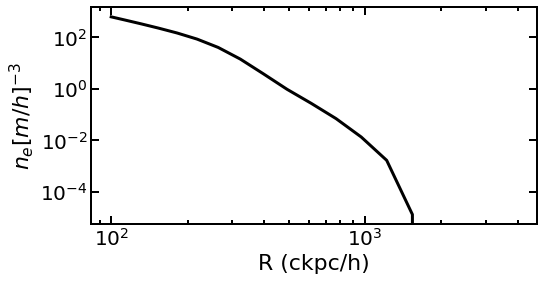

In [38]:
R_centers = 0.5*(R[:1] + R[:-1])
stacked_profile = np.average(p1h[:,0], axis = 0)
fig, ax = plt.subplots(figsize = (8, 4))
ax.loglog(R_centers, stacked_profile, lw = 3, color = "black")
ax.set(xlabel = "R (ckpc/h)", ylabel = "$n_e [m/h]^{-3}$")

## sampler
The sampler is a object to fit a given data with a given covariance matrix using MCMC (`emcee` package). The fancy thing with the sampler is that it can recieve any set of prior and model that reach some specifications. Let's compute the covariance matrix using bootstrapping.

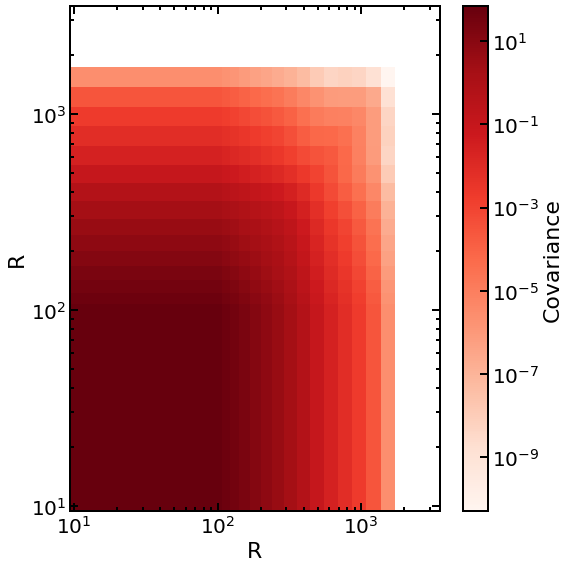

In [34]:
from matplotlib.colors import LogNorm

nsamples = 10000
idx_zero = np.where(stacked_profile == 0)[0][0]
density_profiles = p1h[:,0]
nhalos, nr = np.shape(density_profiles)
boot_profiles = np.zeros((nsamples, nr))
for i in range(nsamples):
    idx_ = np.random.randint(0, nhalos, nhalos)
    boot_profiles[i] = np.nanmean(density_profiles[idx_], axis = 0)
cov = np.cov(boot_profiles, rowvar = False)
R = R_centers
R_edges = R[1:] * R[:-1]
R_edges = np.concatenate(([R[0]**2 / R[1]], R_edges, [R[-1]**2 / R[-2]]))**0.5

fig, ax = plt.subplots(figsize=(8,8))

im = ax.pcolormesh(
    R_edges, R_edges, cov,
    cmap="Reds",
    shading='auto',
    norm = LogNorm(),
)

ax.set_xscale("log")
ax.set_yscale("log")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Covariance")

ax.set_xlabel("R")
ax.set_ylabel("R")

plt.tight_layout()
plt.show()

The last columns and rows are white because there are no data at that radius (actually there is but is zero), so is neccesary to cut the covariance matrix until the mean profile is not zero.

In [35]:
stacked_profile

array([6.24675860e+02, 4.65819024e+02, 3.34121777e+02, 2.28561362e+02,
       1.47366982e+02, 8.53276864e+01, 4.04332291e+01, 1.42687219e+01,
       3.84260623e+00, 9.61360215e-01, 2.72110181e-01, 6.97152525e-02,
       1.34721393e-02, 1.66979171e-03, 1.31320285e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [36]:
idx_ = np.where(stacked_profile == 0)[0][0]
new_stacked_profile = stacked_profile[:idx_]
new_cov = cov[:idx_, :idx_]

Use your favorite way to compute the covariance matrices. I used bootstrapping + [next reference](https://arxiv.org/pdf/1810.10984)

In [37]:
eigenvalues, eigenvectors = np.linalg.eigh(new_cov)

In [38]:
lambda1, lambdaN = np.sort(eigenvalues)[-1], np.sort(eigenvalues)[0]
kmax = 1e5
delta = (lambda1 - lambdaN*kmax)/(kmax - 1)
r_cov = new_cov + delta*np.eye(len(new_cov)) 
np.linalg.cond(r_cov)

100000.00000000001

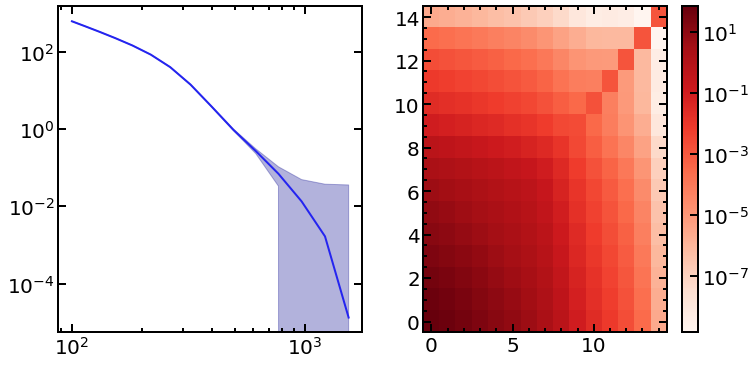

In [39]:
std = np.sqrt(np.diag(r_cov))
x = R_centers[:idx_]
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12, 6))
ax1.loglog(x, new_stacked_profile)
ax1.fill_between(x, new_stacked_profile - std, new_stacked_profile + std, 
                 color = "darkblue", alpha = 0.3)
im = ax2.imshow(np.abs(r_cov), cmap = "Reds", norm = LogNorm(), origin = "lower", aspect = "auto")
plt.colorbar(im)

Let's now define a sampler and run a simply model. 

In [40]:
x = R_centers[:idx_]
y = new_stacked_profile
s = stackforge.sampler(x, y, r_cov, root = 'functions')

Let's save the sampler first to load in the future.

In [41]:
s.save(folder = "example")

It generates a `folder` called `example` with three files: `x.txt`, `y.txt` and `cov.txt`, also the files generate by `emcee` will be automatically added to this folder. To load the file it is necessary to run `load`

In [42]:
s = stackforge.sampler.load(folder = "example", load_chain = False) #a copy of the original :) 
s.x

array([ 100.        ,  113.71374929,  131.18883696,  153.45690406,
        181.83254494,  217.99091431,  264.06661994,  322.77973906,
        397.59639809,  492.93339521,  614.41894584,  769.22494414,
        966.49035542, 1217.86073455, 1538.17572082])

First is necessary define priors by using `generate_priors`, it accepts a list of priors with the next syntax:

    ["param_name1|behavior|prior_function1|args (separated by a comma)", "params_name2|prior_function2..."]

All the prior should be contained in a file called `functions.py`, to change the file simply change `root`. Behavior can be `free` or `fixed`, if is fixed the argument will be assumed as the fixed value of the parameter. The last two arguments in `args` are assumed as `vmin` and `vmax`

In [61]:
priors = ["p0|free|flat_prior|1,4",
          "gamma|free|t_student_prior_truncated|1,0,0,10",
          "beta|free|t_student_prior_truncated|1,0,0,10",
          "alpha|free|t_student_prior_truncated|1,0,0,10",
          "rs|free|flat_prior| 1, 3.5"] 
s.generate_priors(priors)

In [62]:
model = "gnfw"

Model must be a function also contained on `root`, now let's run the sampler:

In [63]:
nwalkers = 30
nsamples = 5000
s.run(model, nwalkers, nsamples, ncores = 16, overwrite = True, output_file = "example", use_numba = False,
      demo = False, folder = "example")

100%|██████████| 5000/5000 [02:12<00:00, 37.72it/s]


The chain with the $\chi^2$ and the sampled signal can be load trought `load_chain`

In [64]:
chain, blobs = s.load_chain(filename = "example/example")
ndims = np.shape(chain)[1]
signal = blobs["signal"] #sampled signal
chi2 = blobs["chi2"] #chi2 along the chain 
print(np.shape(chi2))
print(np.shape(signal))
print(np.shape(chain))

(5000, 30)
(5000, 30, 15)
(150000, 5)


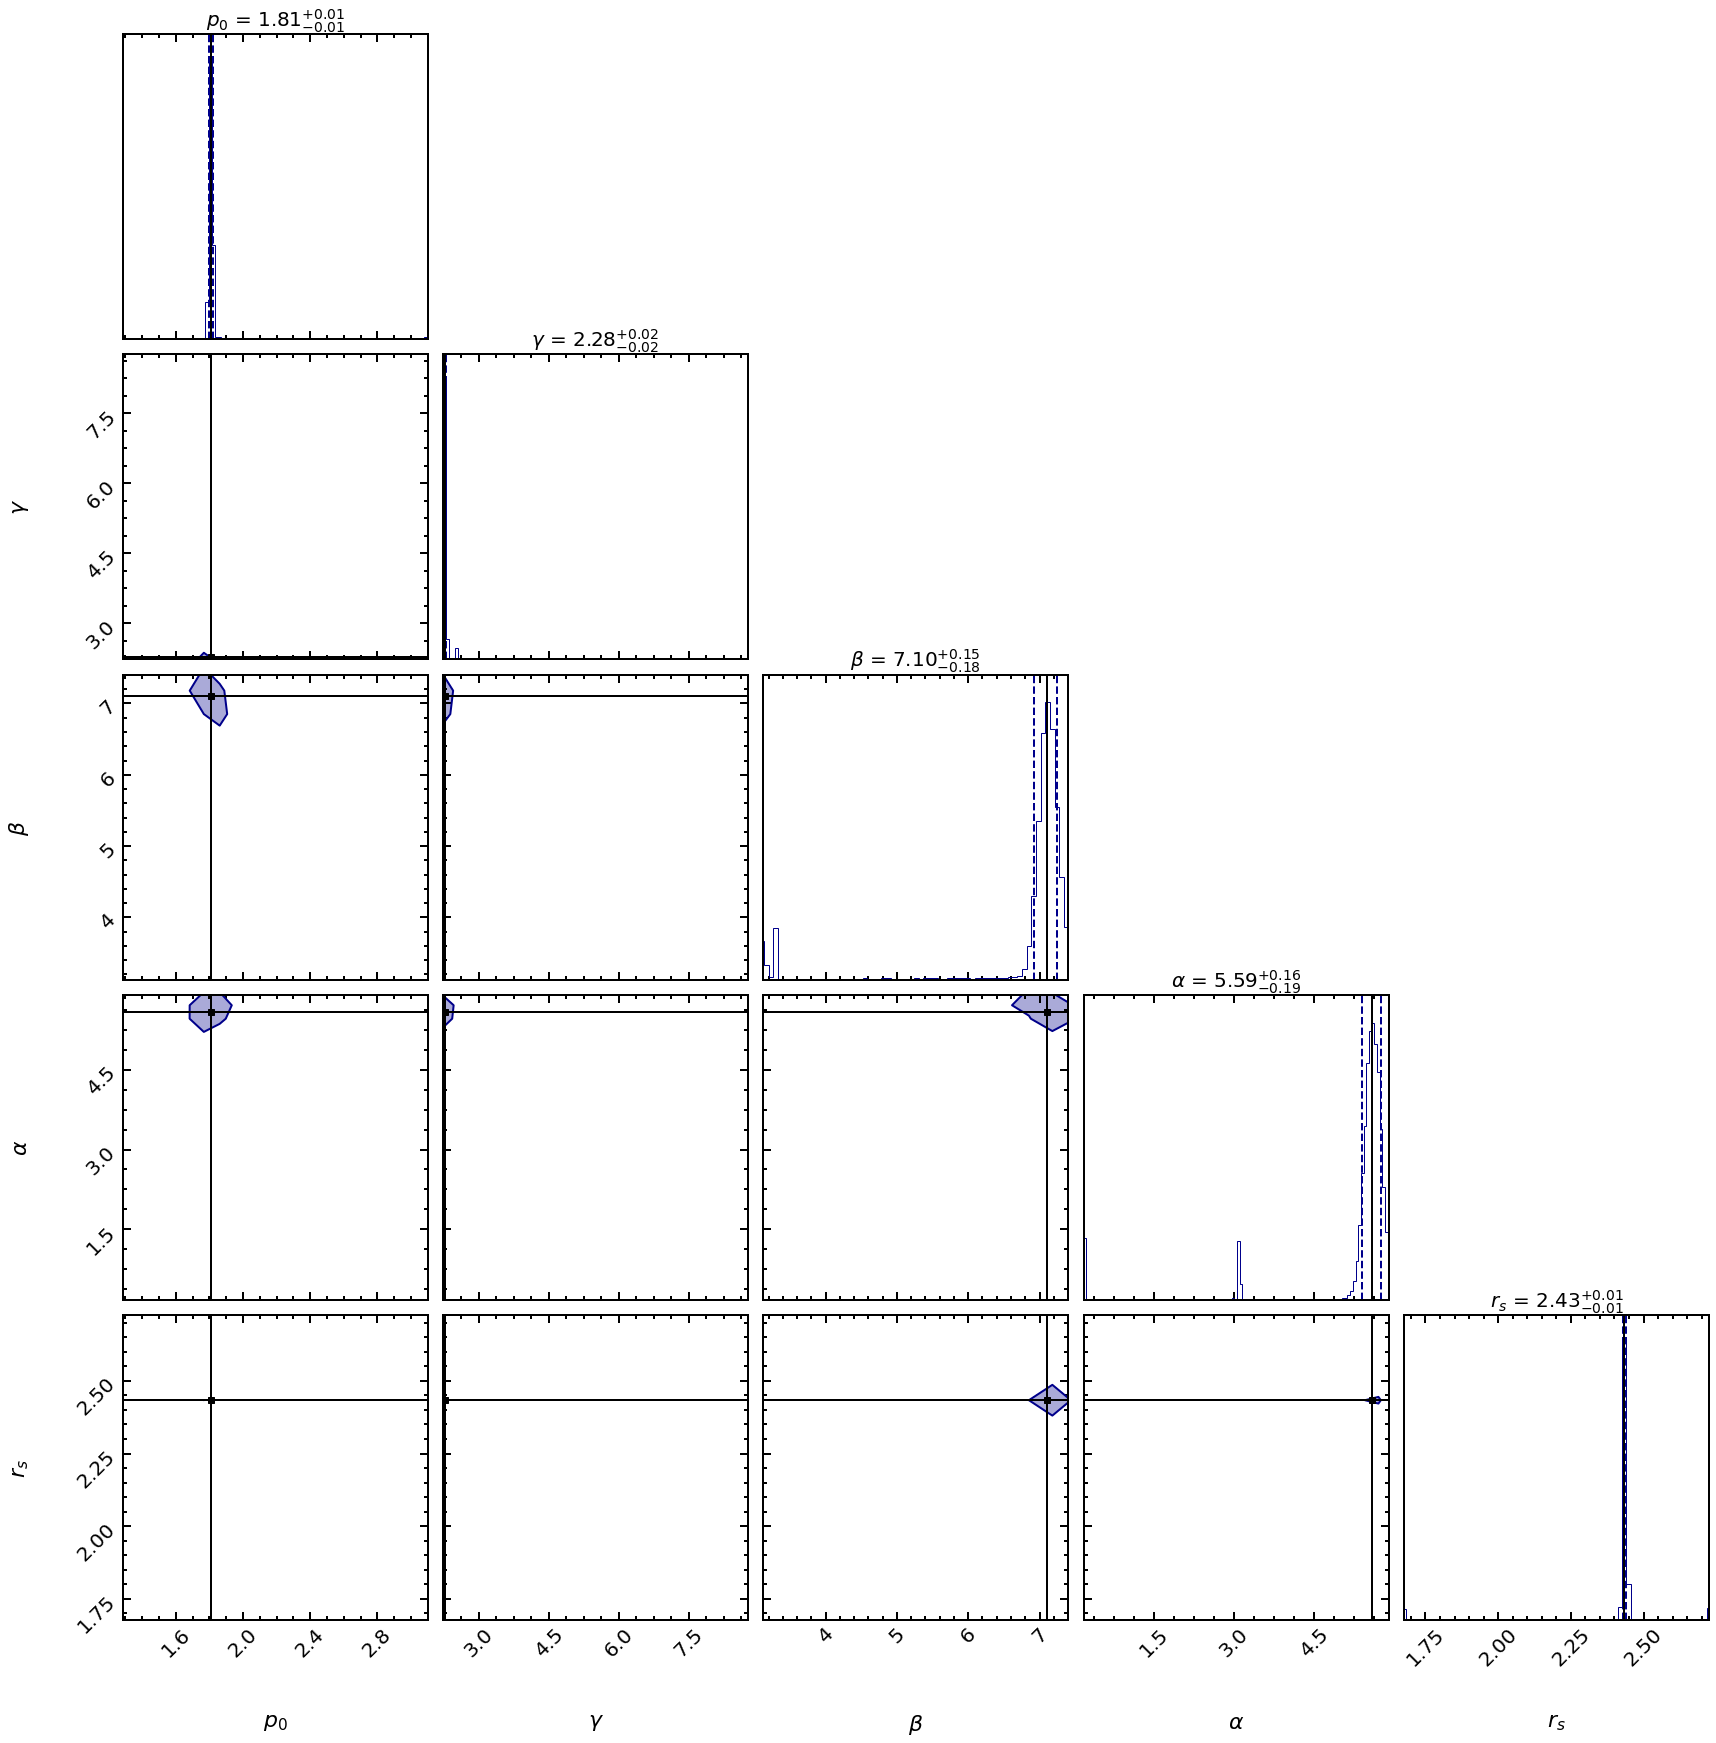

In [65]:
fig = s.plot_corner(filename = "example/example.h5", smooth = None, discard = 0, thin = 1, sigma_ratio = 2)

To reload a chain with the signal and $\chi^2$ is possible use `load` again.

In [66]:
s, chain, blobs = stackforge.sampler.load(folder = "example", load_chain = True)

In [67]:
from scipy import stats

def pte(chi2, cov, cinv=None, n_samples=10000, return_samples=False, return_realizations = False):
    if len(cov.shape) == 1:
        cov = np.eye(cov.size) * cov
    assert len(cov.shape) == 2
    assert cov.shape[0] == cov.shape[1]
    if cinv is None:
        cinv = np.linalg.pinv(cov)
    mc = stats.multivariate_normal(allow_singular = True, cov=cov).rvs(size=n_samples)
    chi2_mc = np.array([np.dot(i, np.dot(cinv, i)) for i in mc])
    pte = (chi2_mc > chi2).sum() / n_samples
    if return_samples == False and return_realizations == False:
        return pte
    else:
        output = [pte]
        if return_samples == True:
            output.append(chi2_mc)
        if return_realizations == True:
            output.append(mc)
        return output

obs pte = 0.3967
min chi2 = 15.724250365432994


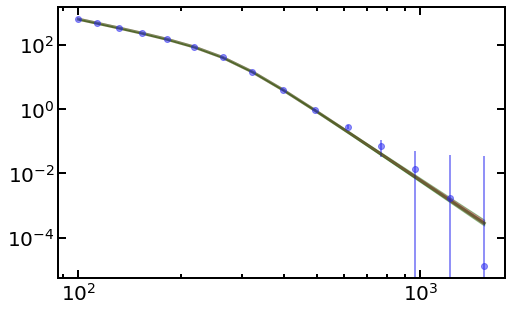

In [71]:
measured_profile = s.y
x = s.x
cov = s.cov
chi2 = blobs["chi2"]
signal = blobs["signal"]

ndims = np.shape(chain)[1]
nsteps, nwalkers = np.shape(chi2)
chi2_min = np.nanmin(chi2)
chi2_r_min = chi2_min / (len(x) - ndims)
flat_idx = np.nanargmin(chi2)
step_idx, walker_idx = np.unravel_index(flat_idx, chi2.shape)
best_signal = signal[step_idx, walker_idx,:]
best_params = np.reshape(chain, (nsteps, nwalkers, -1))[step_idx, walker_idx,:]

obs_pte = pte(chi2_min, cov)
print(f"obs pte = {obs_pte}")
print(f"min chi2 = {chi2_min}")
signal = np.reshape(signal, (-1, len(x)))

m16, m, m84 = np.nanpercentile(signal, [16, 50, 84], axis = 0)

fig, ax = plt.subplots(figsize = (8, 5))
ax.errorbar(x, measured_profile, yerr = std, fmt = "o", alpha = 0.5)
ax.loglog(x, m, color = "darkred", lw = 3, alpha = 0.4)
ax.loglog(x, best_signal, color = "darkgreen", lw = 3, alpha = 0.4)
ax.fill_between(x, m16, m84, alpha = 0.4, color = "darkred", edgecolor = "green")